# Prediction of Traffic Accident Risk
Team 7: 어서오십쇼HUMAN  
Editor: 허윤행, 김용현
## 1. Preprocess

In [2]:
# 사전 준비
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn
import warnings

plt.style.use('seaborn')
sns.set(font_scale=2.5)

warnings.filterwarnings('ignore')

%matplotlib inline

In [3]:
import matplotlib
from matplotlib import font_manager, rc
import platform

if platform.system() == 'Windows':
# 윈도우인 경우
    font_name = font_manager.FontProperties(fname="c:/Windows/Fonts/malgun.ttf").get_name()
    rc('font', family=font_name)
else:    
# Mac 인 경우
    rc('font', family='AppleGothic')
    
matplotlib.rcParams['axes.unicode_minus'] = False   


In [4]:
sample = pd.read_csv('../input/sample_accident2.csv')

print("sample.shape:", sample.shape)

# 초기 샘플 데이터
sample

sample.shape: (285331, 70)


,accident_index,vehicle_reference,vehicle_type,towing_and_articulation,vehicle_manoeuvre,vehicle_location-restricted_lane,junction_location,skidding_and_overturning,hit_object_in_carriageway,vehicle_leaving_carriageway,...,age_band_of_casualty,casualty_severity,pedestrian_location,pedestrian_movement,car_passenger,bus_or_coach_passenger,pedestrian_road_maintenance_worker,casualty_type,casualty_home_area_type,casualty_imd_decile
0,201506E098757,2,9,0,18,0,8,0,0,0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,201506E098766,1,9,0,9,0,8,0,0,0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,201506E098766,2,9,0,18,0,8,0,0,0,...,8.0,3.0,0.0,0.0,0.0,0.0,0.0,9.0,1.0,3.0
3,201506E098777,1,20,0,4,0,0,0,0,0,...,6.0,3.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0
4,201506E098780,1,9,0,15,0,1,0,0,0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
285326,2015984141415,9,9,0,18,0,0,1,0,0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
285327,2015984141415,10,9,0,18,0,0,1,0,1,...,4.0,3.0,0.0,0.0,0.0,0.0,0.0,9.0,2.0,5.0
285328,2015984141415,11,9,0,18,0,0,1,0,1,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
285329,2015984141415,12,9,0,18,0,0,1,0,0,...,6.0,3.0,0.0,0.0,0.0,0.0,0.0,9.0,3.0,-1.0


'''
‘accident_index’				// 사고 번호				type: object, Ex 201593401920
‘vehicle_reference’				// 차량 레퍼런스				type: int, 1 ~ 37
‘vehicle_type’					// 차량 종류				type: int, -1 ~ 98
‘towing_and_articulation’ 		// 직관적이고 관철적인 표현?	type: int -1 ~ 5
'vehicle_manoeuvre’ 			// 차량 기동				type: int
'vehicle_location-restricted_lane’	// 차량 위치 제한 차전
‘junction_location’				// 입장소?
‘skidding_and_overturning’	// 돌아가고 뒤집는다??
'hit_object_in_carriageway’	// 도로에서 물체에 박음
‘vehicle_leaving_carriageway’// 차로 이탈
'hit_object_off_carriageway’	// 도로에서 물체에 부딪힘
‘1st_point_of_impact’			// 1차 충돌
'was_vehicle_left_hand_drive?’	// 왼손잡이
‘journey_purpose_of_driver’	// 운전한 목적
‘sex_of_driver’					// 운전자 성별
'age_of_driver’					// 운전자 나이
‘age_band_of_driver’			// 운전자 연령대
'engine_capacity_(cc)’			// 엔진 용량(단위: cc)
‘propulsion_code’				// 추진 코드?
‘age_of_vehicle’				// 차량 나이
‘driver_imd_decile’				// 운전자 imd decile?
'driver_home_area_type’		// 운전자 home area?
‘vehicle_imd_decile’			// 차량 imd decile?
'NUmber_of_Casualities_unique_to_accident_index’		// 사고 번호의 캐주얼 수?
'No_of_Vehicles_involved_unique_to_accident_index’	// 사고 번호와 연관된 차량 없음?
‘location_easting_osgr’		// ????
‘location_northing_osgr’		// ???
'longitude’						// 경도
‘latitude’						// 위도
‘police_force’					// 경찰 유무?
‘accident_severity’				// 사고 심각도 type: int 0~3
'number_of_vehicles’			// 사고 차량 수
‘number_of_casualties’			// 사상자 수
‘date’								// 날짜
‘day_of_week’					// 요일
'time’								// 시간
'local_authority_(district)’	// 지방 구역
'local_authority_(highway)’	// 지방 권한
‘1st_road_class’				// 1등급 도로?
‘1st_road_number’				// 1등급 도로 번호?
‘road_type’						// 도로 종류
'speed_limit’					// 제한 속도
‘junction_detail’				// ?
‘junction_control’				// ?
'2nd_road_class’				// 2등급?
‘2nd_road_number’				// 2등급!
'pedestrian_crossing-human_control’		// 보행자 통제
'pedestrian_crossing-physical_facilities’	// 보행자 ??
'light_conditions’				// 빛 조건
‘weather_conditions’			// 날씨
'road_surface_conditions’		// 도로 표면 상태
‘special_conditions_at_site’	// 현장의 특수한 조건
‘carriageway_hazards’			// 위험도?
‘urban_or_rural_area’			// 도시인지 농촌인지
‘did_police_officer_attend_scene_of_accident’	// 경찰관이 사고 현장에 참석했는가
‘lsoa_of_accident_location’	// 사고 현장의 lsoa?
‘casualty_reference’			// 피해자 레퍼런스
'casualty_class’				// 피해자 종류
‘sex_of_casualty’				// 피해자 성별
‘age_of_casualty’				// 피해자 나이
'age_band_of_casualty’			// 피해자 연령대
‘casualty_severity’				// 피해자 심각도
‘pedestrian_location’			// 보행자 위치
'pedestrian_movement’			// 보해앚 행동
‘car_passenger’					// 보행자
'bus_or_coach_passenger’		// 버스 승객?
‘pedestrian_road_maintenance_worker’	// ??
'casualty_type’					// 피해자 종류
‘casualty_home_area_type’		// 피해자의 home area?
'casualty_imd_decile’			// 피해자 imd decile?
'''

In [5]:
sample.dtypes

accident_index                         object
vehicle_reference                       int64
vehicle_type                            int64
towing_and_articulation                 int64
vehicle_manoeuvre                       int64
                                       ...   
bus_or_coach_passenger                float64
pedestrian_road_maintenance_worker    float64
casualty_type                         float64
casualty_home_area_type               float64
casualty_imd_decile                   float64
Length: 70, dtype: object

In [6]:
sample.describe()

,vehicle_reference,vehicle_type,towing_and_articulation,vehicle_manoeuvre,vehicle_location-restricted_lane,junction_location,skidding_and_overturning,hit_object_in_carriageway,vehicle_leaving_carriageway,hit_object_off_carriageway,...,age_band_of_casualty,casualty_severity,pedestrian_location,pedestrian_movement,car_passenger,bus_or_coach_passenger,pedestrian_road_maintenance_worker,casualty_type,casualty_home_area_type,casualty_imd_decile
count,285331.000000,285331.000000,285331.000000,285331.000000,285331.000000,285331.000000,285331.000000,285331.000000,285331.000000,285331.000000,...,186072.000000,186072.000000,186072.000000,186072.000000,186072.000000,186072.000000,186072.000000,186072.000000,186072.000000,186072.000000
mean,1.557030,9.570765,0.026741,12.625323,0.124038,2.700075,0.200041,0.340356,0.377502,0.590244,...,6.245512,2.862462,0.672277,0.481631,0.255992,0.079383,0.060428,7.277414,1.045665,3.848236
std,0.760106,8.515910,0.289672,6.191873,0.965362,3.270800,0.748732,1.679784,1.393303,2.168011,...,2.386162,0.370414,1.951045,1.663396,0.575932,0.534076,0.345463,7.506004,0.959294,3.491443
min,1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,...,-1.000000,1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,0.000000,-1.000000,-1.000000
25%,1.000000,9.000000,0.000000,7.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,5.000000,3.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.000000,1.000000,1.000000
50%,1.000000,9.000000,0.000000,17.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,...,6.000000,3.000000,0.000000,0.000000,0.000000,0.000000,0.000000,9.000000,1.000000,4.000000
75%,2.000000,9.000000,0.000000,18.000000,0.000000,6.000000,0.000000,0.000000,0.000000,0.000000,...,8.000000,3.000000,0.000000,0.000000,0.000000,0.000000,0.000000,9.000000,1.000000,7.000000
max,37.000000,98.000000,5.000000,18.000000,9.000000,8.000000,5.000000,12.000000,8.000000,11.000000,...,11.000000,3.000000,10.000000,9.000000,2.000000,4.000000,2.000000,98.000000,3.000000,10.000000


In [8]:
# 결측값 비율
sample.isnull().sum() / sample.shape[0]

accident_index                        0.000000
vehicle_reference                     0.000000
vehicle_type                          0.000000
towing_and_articulation               0.000000
vehicle_manoeuvre                     0.000000
                                        ...   
bus_or_coach_passenger                0.347873
pedestrian_road_maintenance_worker    0.347873
casualty_type                         0.347873
casualty_home_area_type               0.347873
casualty_imd_decile                   0.347873
Length: 70, dtype: float64

In [14]:
sample.dropna()

,accident_index,vehicle_reference,vehicle_type,towing_and_articulation,vehicle_manoeuvre,vehicle_location-restricted_lane,junction_location,skidding_and_overturning,hit_object_in_carriageway,vehicle_leaving_carriageway,...,age_band_of_casualty,casualty_severity,pedestrian_location,pedestrian_movement,car_passenger,bus_or_coach_passenger,pedestrian_road_maintenance_worker,casualty_type,casualty_home_area_type,casualty_imd_decile
2,201506E098766,2,9,0,18,0,8,0,0,0,...,8.0,3.0,0.0,0.0,0.0,0.0,0.0,9.0,1.0,3.0
3,201506E098777,1,20,0,4,0,0,0,0,0,...,6.0,3.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0
5,201506E098780,2,1,0,9,0,5,0,0,0,...,8.0,3.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,2.0
6,201506E098792,1,3,0,4,0,2,0,0,0,...,6.0,3.0,0.0,0.0,0.0,0.0,0.0,3.0,1.0,3.0
8,201506E098804,1,9,0,14,0,1,0,0,0,...,3.0,3.0,1.0,2.0,0.0,0.0,0.0,0.0,1.0,2.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
269129,201563DP43615,2,16,0,4,0,0,0,0,0,...,10.0,2.0,0.0,0.0,0.0,0.0,0.0,16.0,-1.0,-1.0
269130,201563DP43715,1,9,0,18,0,0,5,0,0,...,8.0,3.0,0.0,0.0,0.0,0.0,0.0,9.0,3.0,-1.0
269131,201563DP43815,1,9,0,18,0,1,0,0,0,...,3.0,3.0,0.0,0.0,1.0,0.0,0.0,9.0,3.0,-1.0
269132,201563DP43815,2,9,0,18,0,1,0,0,0,...,11.0,3.0,0.0,0.0,0.0,0.0,0.0,9.0,2.0,-1.0


In [26]:
df2 = sample[['special_conditions_at_site','pedestrian_movement','road_surface_conditions','light_conditions','weather_conditions','age_of_vehicle','sex_of_driver','age_of_driver','junction_location', 'junction_detail','junction_control','did_police_officer_attend_scene_of_accident','accident_severity','day_of_week']]
df1 = sample[['special_conditions_at_site','pedestrian_movement','age_of_vehicle','sex_of_driver','age_of_driver','junction_location','junction_detail','junction_control','did_police_officer_attend_scene_of_accident','day_of_week','accident_severity']]


In [35]:
df1.replace(-1, np.nan, inplace=True) # -1 should be imputed to NaN to be recognized as missing in the next row
df1=df1.dropna() # I drop all the rows with missing data once again

df2.replace(-1, np.nan, inplace=True) # Same as previously 
df2=df2.dropna()

print(df1.shape, df2.shape)

(72338, 10) (72249, 13)


In [30]:
df2.dtypes

special_conditions_at_site                     float64
pedestrian_movement                            float64
road_surface_conditions                        float64
light_conditions                                 int64
weather_conditions                               int64
age_of_vehicle                                 float64
sex_of_driver                                  float64
age_of_driver                                  float64
junction_location                              float64
junction_detail                                float64
junction_control                               float64
did_police_officer_attend_scene_of_accident    float64
accident_severity                                int64
day_of_week                                      int64
dtype: object

In [32]:
df1.dtypes

special_conditions_at_site                     float64
pedestrian_movement                            float64
age_of_vehicle                                 float64
sex_of_driver                                  float64
age_of_driver                                  float64
junction_location                              float64
junction_detail                                float64
junction_control                               float64
did_police_officer_attend_scene_of_accident    float64
day_of_week                                      int64
accident_severity                                int64
dtype: object

In [37]:
df2.isnull().sum() / df2.shape[0]

special_conditions_at_site    0.0
pedestrian_movement           0.0
road_surface_conditions       0.0
light_conditions              0.0
weather_conditions            0.0
age_of_vehicle                0.0
sex_of_driver                 0.0
age_of_driver                 0.0
junction_location             0.0
junction_detail               0.0
junction_control              0.0
accident_severity             0.0
day_of_week                   0.0
dtype: float64

In [39]:
df1.isnull().sum() / df1.shape[0]

special_conditions_at_site    0.0
pedestrian_movement           0.0
age_of_vehicle                0.0
sex_of_driver                 0.0
age_of_driver                 0.0
junction_location             0.0
junction_detail               0.0
junction_control              0.0
day_of_week                   0.0
accident_severity             0.0
dtype: float64

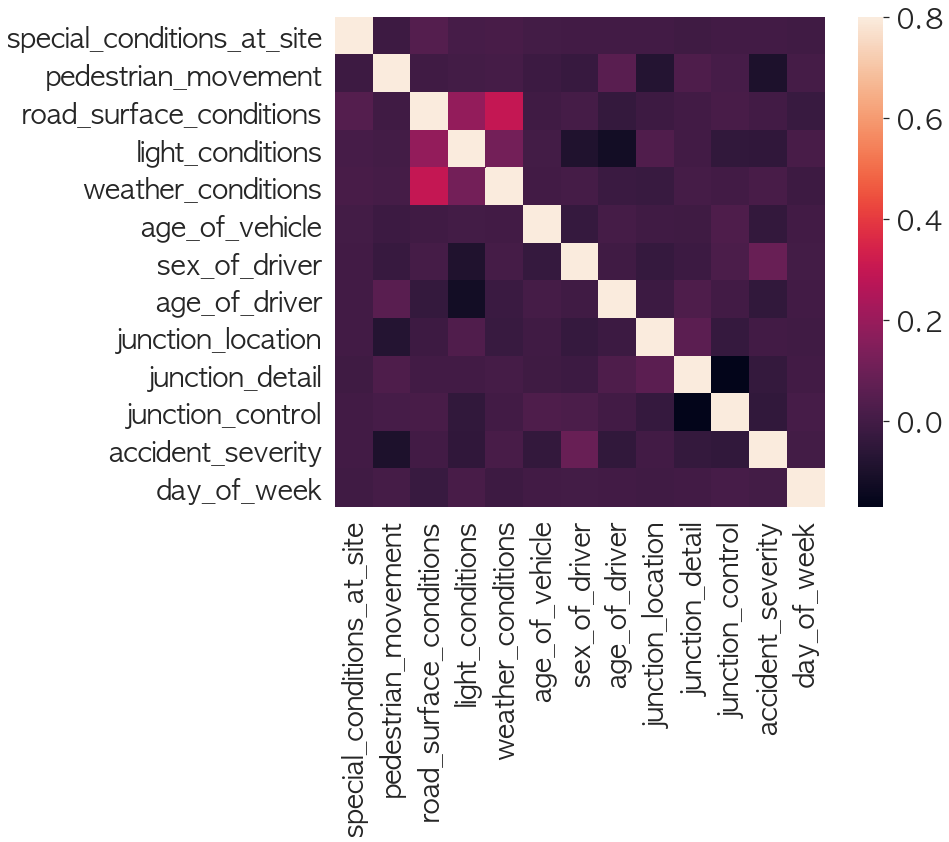

In [41]:
corrmat = df2.corr()
f, ax = plt.subplots(figsize=(12, 9))
sns.heatmap(corrmat, vmax=.8, square=True)

#ax = sns.pairplot(df, size)
plt.show()

Index(['accident_severity', 'sex_of_driver', 'weather_conditions',
       'day_of_week', 'special_conditions_at_site', 'road_surface_conditions'],
      dtype='object')


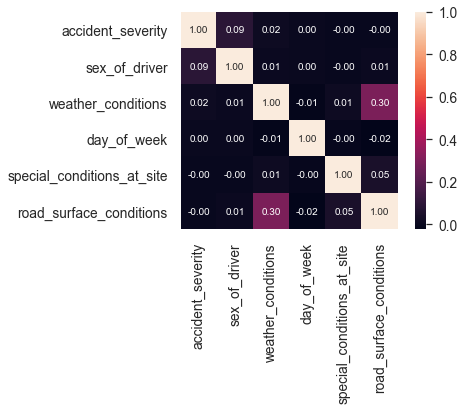

In [43]:
k = 6 #number of variables for heatmap
cols = corrmat.nlargest(k, 'accident_severity')['accident_severity'].index
print(cols)
cm = np.corrcoef(df2[cols].values.T)
sns.set(font_scale=1.25)
hm = sns.heatmap(cm, cbar=True, annot=True, square=True, fmt='.2f', annot_kws={'size': 10}, yticklabels=cols.values, xticklabels=cols.values)
plt.show()

In [44]:
df2.head()

,special_conditions_at_site,pedestrian_movement,road_surface_conditions,light_conditions,weather_conditions,age_of_vehicle,sex_of_driver,age_of_driver,junction_location,junction_detail,junction_control,accident_severity,day_of_week
6,0.0,0.0,1.0,7,1,8.0,2.0,27.0,2.0,6.0,2.0,3,5
8,0.0,2.0,1.0,1,1,1.0,1.0,24.0,1.0,3.0,2.0,3,5
14,0.0,0.0,1.0,1,1,1.0,2.0,23.0,8.0,6.0,4.0,3,4
25,0.0,0.0,1.0,1,1,8.0,2.0,48.0,8.0,3.0,4.0,3,7
26,0.0,3.0,1.0,1,1,7.0,2.0,47.0,8.0,3.0,4.0,3,5


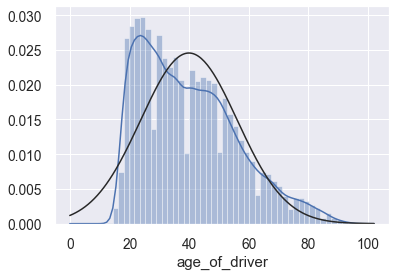

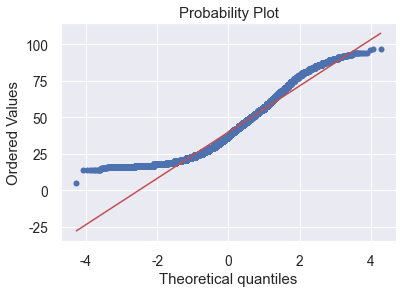

In [45]:
from scipy.stats import norm
from scipy import stats
#histogram and normal probability plot
sns.distplot(df1['age_of_driver'], fit=norm);
fig = plt.figure()
res = stats.probplot(df1['age_of_driver'], plot=plt)
plt.show()

In [46]:
df2['age_of_driver'] = np.log1p(df2['age_of_driver']) 
df2['age_of_vehicle'] = np.log1p(df2['age_of_vehicle'])# standardise the feature

df1['age_of_driver'] = np.log1p(df1['age_of_driver']) 
df1['age_of_vehicle'] = np.log1p(df1['age_of_vehicle'])#

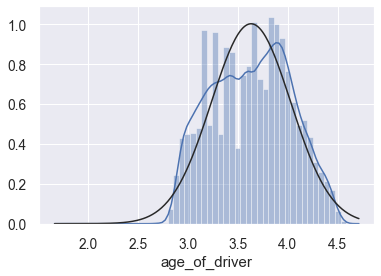

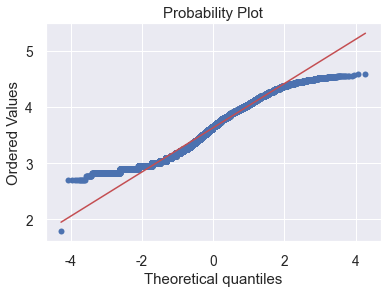

In [47]:
sns.distplot(df1['age_of_driver'], fit=norm);
fig = plt.figure()
res = stats.probplot(df1['age_of_driver'], plot=plt)
plt.show()

In [49]:
df2

,special_conditions_at_site,pedestrian_movement,road_surface_conditions,light_conditions,weather_conditions,age_of_vehicle,sex_of_driver,age_of_driver,junction_location,junction_detail,junction_control,accident_severity,day_of_week
6,0.0,0.0,1.0,7,1,2.197225,2.0,3.332205,2.0,6.0,2.0,3,5
8,0.0,2.0,1.0,1,1,0.693147,1.0,3.218876,1.0,3.0,2.0,3,5
14,0.0,0.0,1.0,1,1,0.693147,2.0,3.178054,8.0,6.0,4.0,3,4
25,0.0,0.0,1.0,1,1,2.197225,2.0,3.891820,8.0,3.0,4.0,3,7
26,0.0,3.0,1.0,1,1,2.079442,2.0,3.871201,8.0,3.0,4.0,3,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...
285297,0.0,1.0,2.0,4,1,2.564949,2.0,3.931826,1.0,3.0,4.0,3,3
285307,0.0,0.0,2.0,1,1,2.484907,2.0,3.218876,8.0,3.0,4.0,3,4
285312,0.0,0.0,2.0,1,2,2.079442,2.0,4.330733,1.0,5.0,4.0,3,7
285313,0.0,0.0,2.0,1,2,1.609438,1.0,3.044522,7.0,5.0,4.0,3,7


In [50]:
df1= df1[:15000] #keep 1500 to decrease running times
df2= df2[:15000] #keep 15000


array([3, 3, 3, ..., 3, 3, 3])

In [51]:

df2.to_csv('../input/pre2.csv', encoding='utf-8-sig',index_label=False)
df1.to_csv('../input/pre1.csv', encoding='utf-8-sig',index_label=False')



,special_conditions_at_site,pedestrian_movement,road_surface_conditions,light_conditions,weather_conditions,age_of_vehicle,sex_of_driver,age_of_driver,junction_location,junction_detail,junction_control,day_of_week
6,0.0,0.0,1.0,7,1,2.197225,2.0,3.332205,2.0,6.0,2.0,5
8,0.0,2.0,1.0,1,1,0.693147,1.0,3.218876,1.0,3.0,2.0,5
14,0.0,0.0,1.0,1,1,0.693147,2.0,3.178054,8.0,6.0,4.0,4
25,0.0,0.0,1.0,1,1,2.197225,2.0,3.891820,8.0,3.0,4.0,7
26,0.0,3.0,1.0,1,1,2.079442,2.0,3.871201,8.0,3.0,4.0,5
...,...,...,...,...,...,...,...,...,...,...,...,...
52567,0.0,0.0,2.0,1,2,1.945910,1.0,3.465736,1.0,9.0,4.0,3
52569,0.0,0.0,2.0,1,2,2.564949,1.0,3.178054,1.0,9.0,4.0,3
52572,0.0,0.0,2.0,1,2,2.708050,2.0,3.931826,6.0,3.0,4.0,3
52573,0.0,1.0,1.0,1,1,2.564949,2.0,3.433987,8.0,7.0,4.0,4
